In [1]:
import pandas as pd
diamond_df = pd.read_csv("diamonds.csv")
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
diamond_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [3]:
diamond_df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [4]:
diamond_df.drop("Unnamed: 0", axis = 1, inplace = True)
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


/var/folders/k3/_6qf6_k90lsb67kn7g_1rv9c0000gn/T/ipykernel_49844/1771939189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(diamond_df.corr(), fmt='.2g', annot=True)


<Axes: >

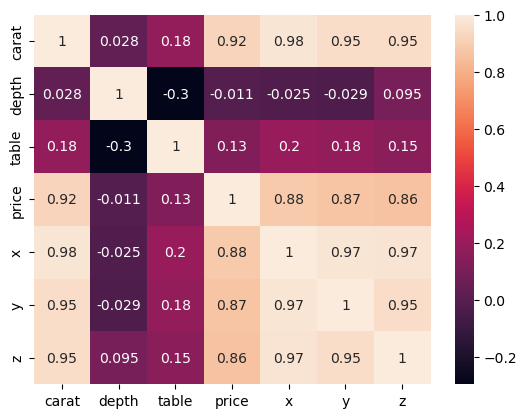

In [5]:
import seaborn as sb
sb.heatmap(diamond_df.corr(), fmt='.2g', annot=True)

In [6]:
diamond_num = diamond_df.select_dtypes(include=["int64", "float64"])
diamond_cat = diamond_df.select_dtypes(include=["object"]).join(diamond_df["price"])

In [7]:
diamond_num

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


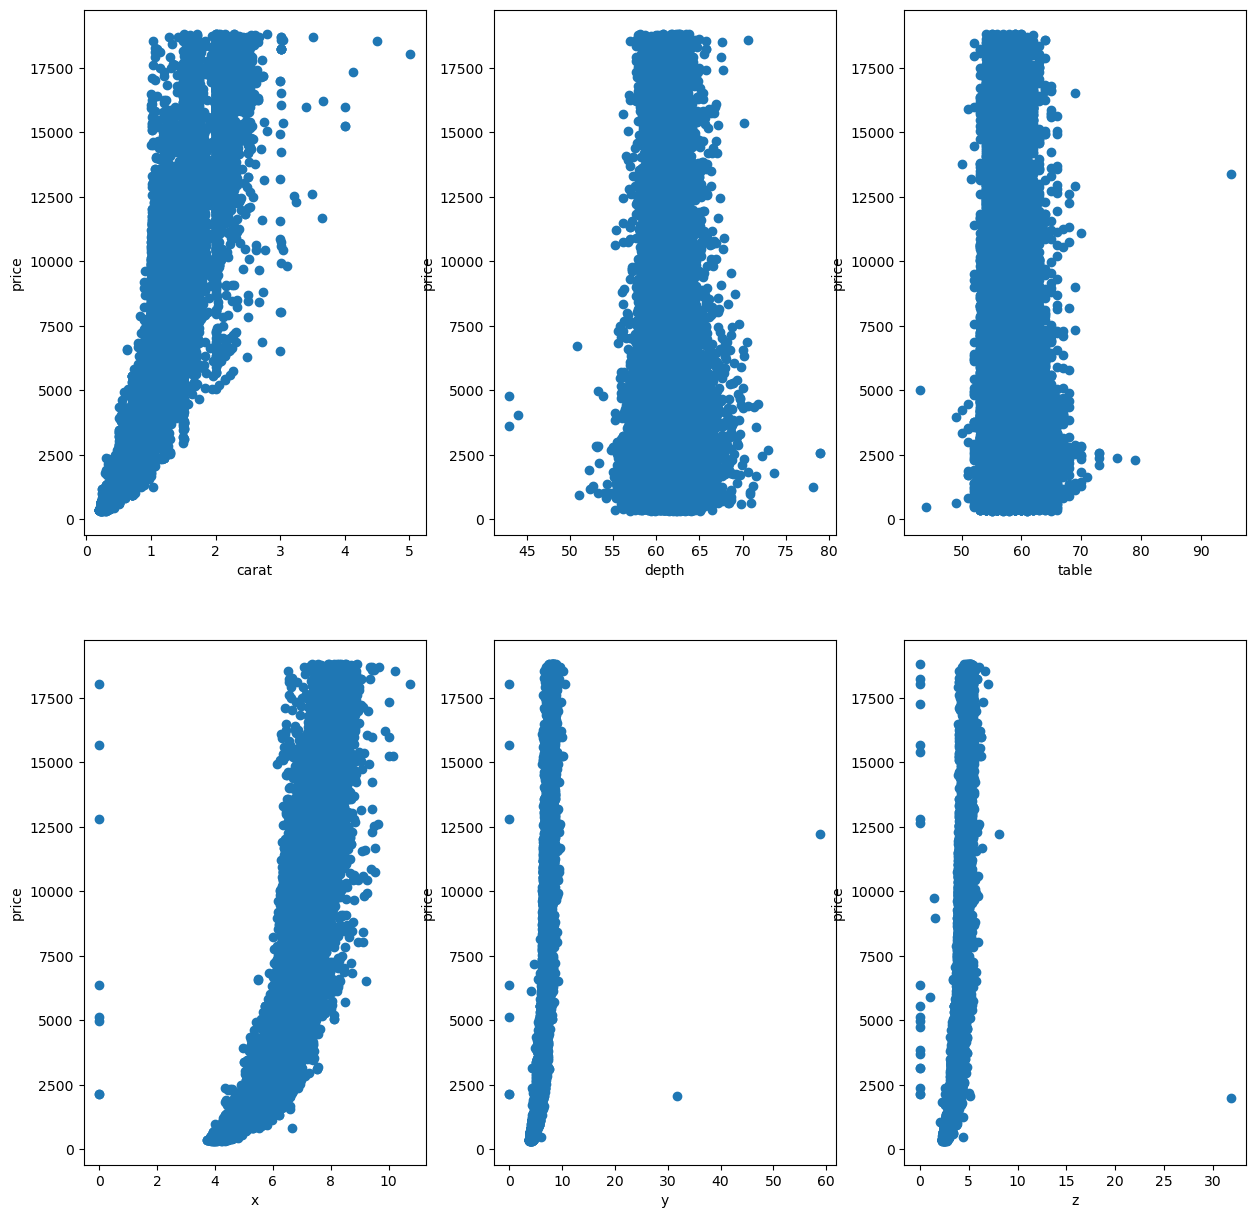

In [8]:
import matplotlib.pyplot as plt
num_fig, num_axs = plt.subplots(2, 3, figsize=(15, 15))
for i in range(2):
    for j in range(3):
        column = list(diamond_num.columns)[j + (i * 4)]
        num_axs[i, j].scatter(diamond_num[column], diamond_num["price"])
        num_axs[i, j].set_xlabel(column)
        num_axs[i, j].set_ylabel("price")

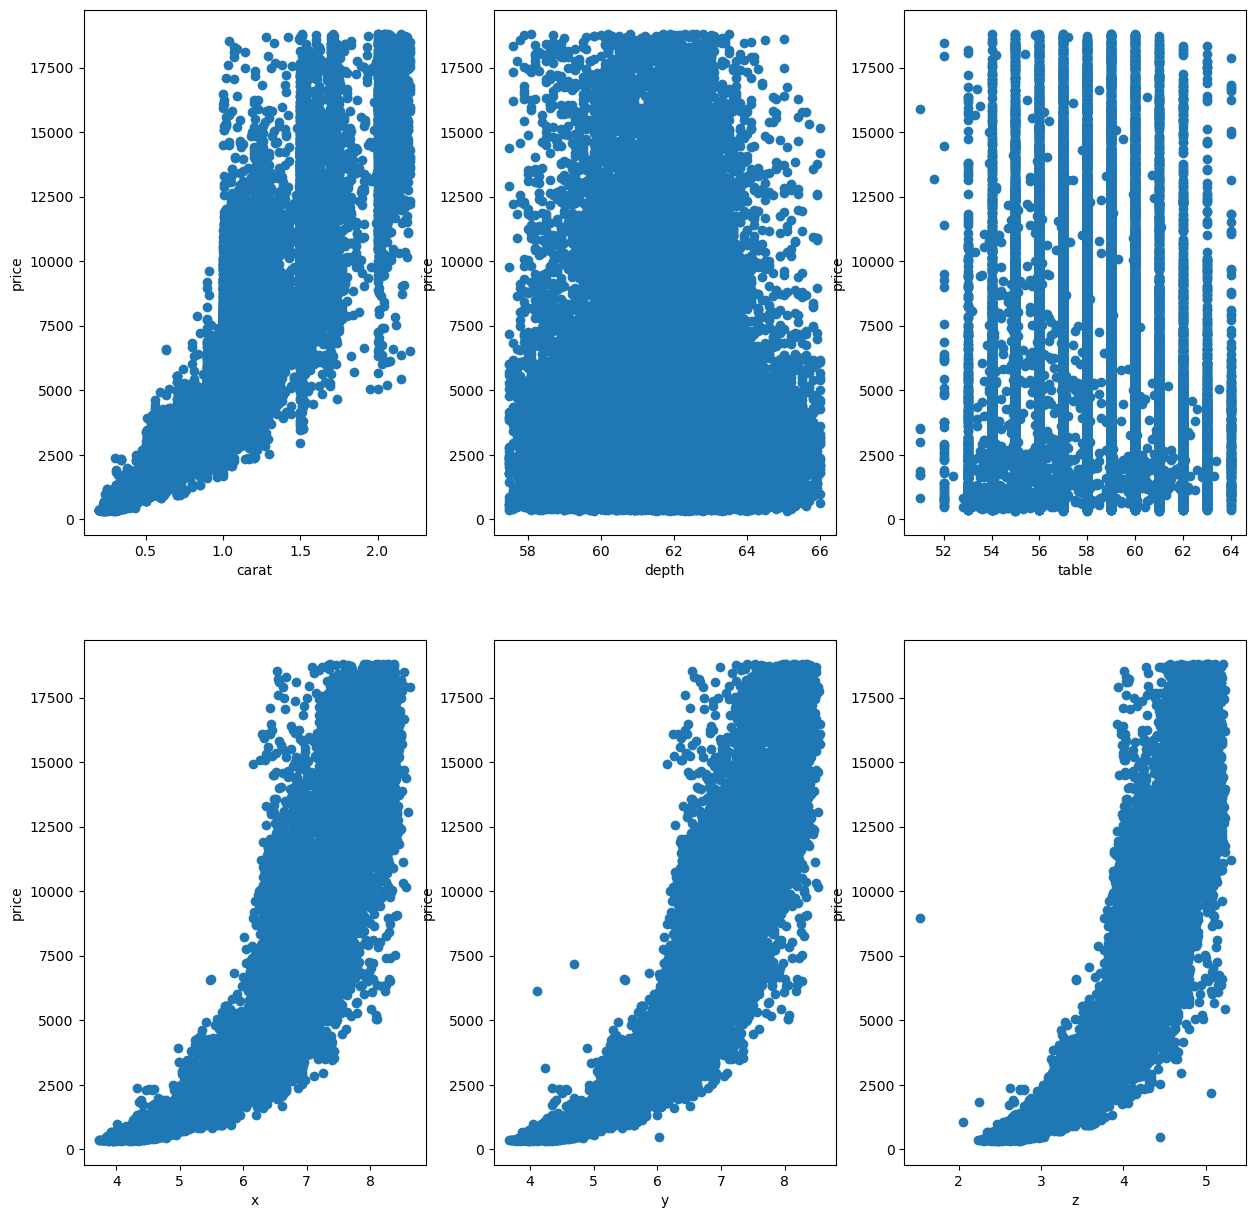

In [9]:
import numpy as np
from scipy import stats
diamond_num = diamond_num[(np.abs(stats.zscore(diamond_num[["carat", "depth", "table", "x", "y", "z"]])) < 3).all(axis=1)]
num_fig, num_axs = plt.subplots(2, 3, figsize=(15, 15))
for i in range(2):
    for j in range(3):
        column = list(diamond_num.columns)[j + (i * 4)]
        num_axs[i, j].scatter(diamond_num[column], diamond_num["price"])
        num_axs[i, j].set_xlabel(column)
        num_axs[i, j].set_ylabel("price")

In [10]:
diamond_num

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
diamond_cat

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53935,Ideal,D,SI1,2757
53936,Good,D,SI1,2757
53937,Very Good,D,SI1,2757
53938,Premium,H,SI2,2757


<Axes: >

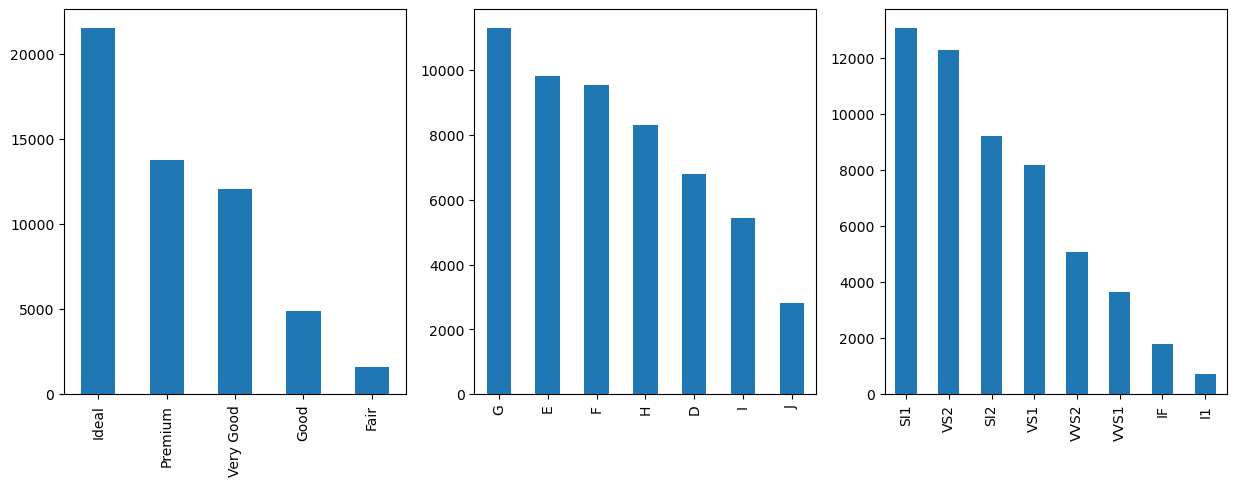

In [12]:
cat_fig, cat_axs = plt.subplots(1, 3, figsize=(15, 5))
diamond_cat["cut"].value_counts().plot(kind = "bar", ax = cat_axs[0])
diamond_cat["color"].value_counts().plot(kind = "bar", ax = cat_axs[1])
diamond_cat["clarity"].value_counts().plot(kind = "bar", ax = cat_axs[2])

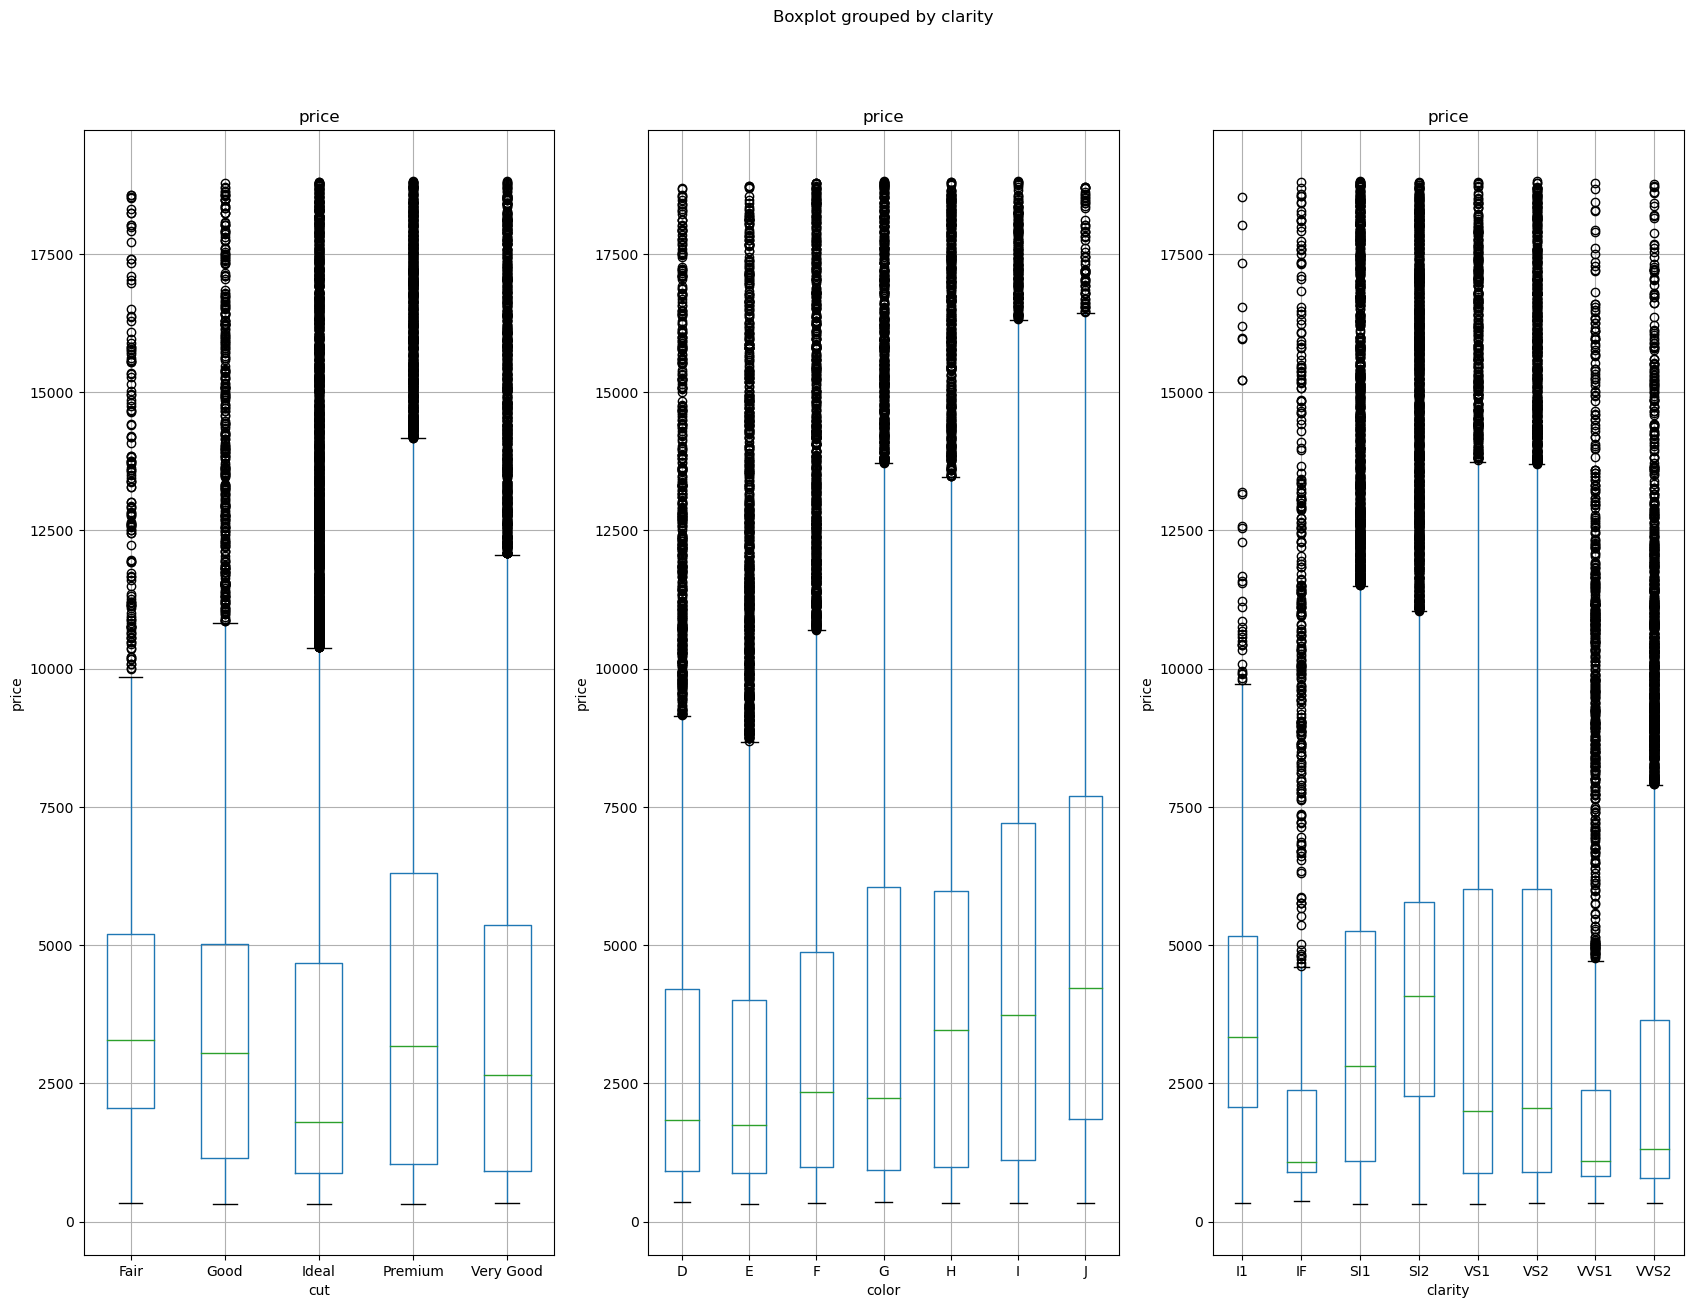

In [13]:
cat_box_fig, cat_box_axs = plt.subplots(1, 3, figsize=(20, 15))
for i in range(3):
    col = list(diamond_cat.columns)[i]
    diamond_cat.boxplot(column = "price", by = col, ax = cat_box_axs[i])
    cat_box_axs[i].set_xlabel(col)
    cat_box_axs[i].set_ylabel("price")

In [14]:
diamond_cleaned_df = diamond_df[(np.abs(stats.zscore(diamond_df[["carat", "depth", "table", "x", "y", "z"]])) < 3).all(axis=1)]
diamond_cleaned_df = diamond_cleaned_df.drop("depth", axis = 1)
diamond_cleaned_df = diamond_cleaned_df.drop("table", axis = 1)
diamond_cleaned_df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [15]:
def onehot(df, feature):
    dummies = pd.get_dummies(df[[feature]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return(res) 

In [19]:
for column in ["cut", "color", "clarity"]:
    diamond_cleaned_df = onehot(diamond_cleaned_df, column)
diamond_cleaned_df

,carat,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,336,3.94,3.96,2.48,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2757,5.75,5.76,3.50,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2757,5.69,5.75,3.61,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,2757,5.66,5.68,3.56,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,2757,6.15,6.12,3.74,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(diamond_cleaned_df, test_size=0.2)
train_y = train_x.pop("price")
test_y = test_x.pop("price")

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300)
model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=300)

In [22]:
pred = model.predict(test_x)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred, squared = False)

530.5622617186824

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y, pred)

0.06425989635400689

In [25]:
for i in range(20):
    print(list(pred)[i], list(test_y)[i])

7071.96 6716
1593.9625 1401
540.52 478
14628.957500000002 15377
830.4941666666667 852
1031.6662202380953 1053
1072.9425 1351
536.635 447
3264.33 3325
853.0475 766
414.9595 480
13673.15 12693
832.0125 814
1924.455 1982
434.0025 591
1163.1125 1074
1072.685 1080
2898.3894999999993 3248
11301.868333333336 12252
806.7325 816


In [31]:
# Get numerical feature importances, from https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd
importances = list(model.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(diamond_cleaned_df.columns, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: carat                Importance: 0.67
Variable: x                    Importance: 0.22
Variable: clarity_IF           Importance: 0.02
Variable: clarity_SI1          Importance: 0.02
Variable: price                Importance: 0.01
Variable: y                    Importance: 0.01
Variable: color_G              Importance: 0.01
Variable: color_H              Importance: 0.01
Variable: color_I              Importance: 0.01
Variable: color_J              Importance: 0.01
Variable: clarity_SI2          Importance: 0.01
Variable: clarity_VS1          Importance: 0.01
Variable: z                    Importance: 0.0
Variable: cut_Fair             Importance: 0.0
Variable: cut_Good             Importance: 0.0
Variable: cut_Ideal            Importance: 0.0
Variable: cut_Premium          Importance: 0.0
Variable: cut_Very Good        Importance: 0.0
Variable: color_D              Importance: 0.0
Variable: color_E              Importance: 0.0
Variable: color_F              Importance: 0.0
V

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]